In [1]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

## Problem 1: Binarization of an image 

For this problem we will use the following beatles picture:

<img src="beatles.jpg" />

### Defining binarization function

Our function will have as an input an image and a threshold

In [85]:
def binarization(img,threshold):
    image = cv2.imread(img)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    binary_image = np.where(gray_image > threshold, 255,0)
    cv2.imshow("Original Image",image)
    #print(np.mean(image))
    #print(binary_image)
    cv2.imwrite("binary_image.jpg",binary_image)
    transformed_image = cv2.imread("binary_image.jpg")     
    cv2.imshow('Binary Image',transformed_image)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    sys.exit()
 

In [86]:
binarization("beatles.jpg",128)

SystemExit: 

This is the resulting beatles image of using a threshold of 128. There are functions and methods that help us find an appropiate threshold according to our image instead of defining a static one.

<img src="binary_image.jpg" />

## Problem 2: Operations with images

We need to define a function that sums, substracts and applies logical operations to two images. For this it is also necessary to transform the image to grayscale and then perform a binary transformation.

For this problem we will use a red circle and a red triangle.

One limitation of our function is that it will only work for images of the same dimension. 

<img src="red_triangle.png" />


<img src="red_circle.png" />


In [328]:
def operations(img1,img2,threshold):
    image_1 = cv2.imread(img1)
    image_2 = cv2.imread(img2)
    
    ###transforming input images to grayscale images and then binarization
    ##image 1
    
    blue_component1 = image_1[:,:,0]
    green_component1 = image_1[:,:,1]
    red_component1 = image_1[:,:,2]
    gray_image_1 = (0.11*blue_component1 + 0.59*green_component1 + 0.3*red_component1)
    
    binary_image_1 =  np.where(gray_image_1 > threshold, 255,0)
    print(binary_image_1)

 ##image 2
    
    blue_component2 = image_2[:,:,0]
    green_component2 = image_2[:,:,1]
    red_component2 = image_2[:,:,2]
    gray_image_2 = (0.11*blue_component2 + 0.59*green_component2 + 0.3*red_component2)
    
    binary_image_2 = np.where(gray_image_2 > threshold,255,0)
    
    ##addition
    #image_3 = binary_image_1 + binary_image_2
    image_3_add = cv2.add(binary_image_1,binary_image_2)
    
    ##substraction
    #image_3 = binary_image_1 - binary_image_2
    image_3_sub = cv2.subtract(binary_image_1,binary_image_2)
    
    ### logical xor
    xor = np.logical_xor(binary_image_1, binary_image_2)
    image_3_xor = np.where(xor > 0,255,0)
    
    ### logical andd
    #andd = np.logical_and(binary_image_1,binary_image_2)
    image_3_andd = np.where((binary_image_1*binary_image_2>0), 255,0)
    
     ### logical or
    orr = np.logical_or(binary_image_1,binary_image_2)
    image_3_orr = np.where(orr > 0,255,0)

    
   
    cv2.imwrite("image_add.jpg",image_3_add)
    image_add = cv2.imread("image_add.jpg")     
    cv2.imshow('Addition of Images',image_add)
    
    cv2.imwrite("image_sub.jpg",image_3_sub)
    image_sub = cv2.imread("image_sub.jpg")     
    cv2.imshow('Subtraction of Images',image_sub)
    
    cv2.imwrite("image_xor.jpg",image_3_xor)
    image_xor = cv2.imread("image_xor.jpg")     
    cv2.imshow('Logical XOR of Images',image_xor)
    
    cv2.imwrite("image_and.jpg",image_3_andd)
    image_andd = cv2.imread("image_and.jpg")     
    cv2.imshow('Logical AND of Images',image_andd)
    
    cv2.imwrite("image_or.jpg",image_3_orr)
    image_orr = cv2.imread("image_or.jpg")     
    cv2.imshow('Logical OR of Images',image_orr)
    
    
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    sys.exit()
    

In [329]:
operations("red_triangle.png","red_circle.png",200)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


SystemExit: 

### Resulting images

#### sum of images 
<img src="add.jpg" />


#### subtraction of images

<img src="sub.jpg" />


#### logical XOR

<img src="xor.jpg" />

#### logical AND

<img src="and.jpg" />

#### logical OR

<img src="or.jpg" />



## Problem 3: Grayscale image on 3D

We will define a function that takes any color image, turns it into grayscale and then plots a histogram on which the Z axis is determined by the color intensity of the pixels. Furthermore, parameters to rotate the histogram will be used as an input.

In [101]:
from mpl_toolkits.mplot3d import Axes3D

In [102]:
def histogram_3D(image,a_zim=-60,elevation=30):
    img = cv2.imread(image)
    ##turning image into grayscale
    gray_image = (0.11*img[:,:,0] + 0.59*img[:,:,1] + 0.3*img[:,:,2])
    
    ##defining a grid to plot the image, based on the pixel dimensions of the image
    xx, yy = np.mgrid[0:gray_image.shape[0], 0:gray_image.shape[1]]
    
    
    fig = plt.figure()
    ax = Axes3D(fig)

    # Get current rotation angle
     #print(ax.azim)
    #ax.view_init(azim=0, elev=90)

    # Set rotation angle to 30 degrees
    ax.view_init(azim=a_zim,elev=elevation)

    ax.plot_surface(xx,yy,gray_image,rstride=1,cstride=1,color="k",alpha=0.75,cmap=plt.cm.gray,
            linewidth=0)

    plt.title(image)    
    plt.show()
    

    
    

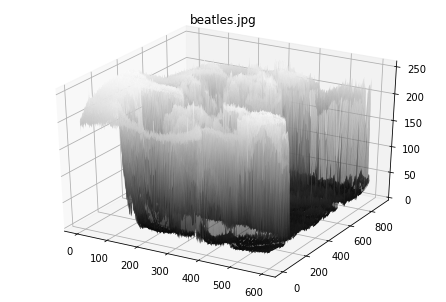

In [103]:
histogram_3D("beatles.jpg")

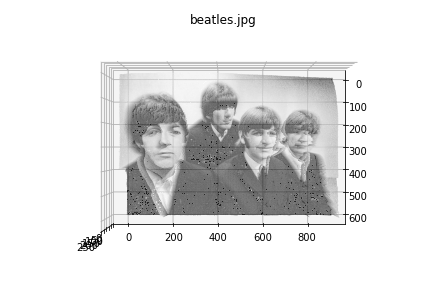

In [286]:
histogram_3D("beatles.jpg",a_zim=0,elevation=90)

## Problem 4: Implementing a function for each transformation: negative, linear, logarithmic and exponential

In [38]:
def transformation(img, alpha = 1, beta = 1, gamma = 1, transformation ="lineal"):
    image_0 = cv2.imread(img)
    image = cv2.cvtColor(image_0,cv2.COLOR_BGR2GRAY)
    height = image.shape[0]
    width = image.shape[1]
    
    
    if transformation == "negative":
        
    
    ### negative image


        negative_image = np.zeros((height,width)) + 256

        negative_image =  (256 - 1) - image
        print("negative")
        cv2.imwrite("image_neg.jpg",negative_image)
        image_neg = cv2.imread("image_neg.jpg")     
        cv2.imshow('Negative Image',image_neg)
    
   
    elif transformation == "multiplication":
        
    #multiplication 
    
        mult_image = alpha*image

        cv2.imwrite("image_mult.jpg",mult_image)
        print("multiplication")
        mult_image = cv2.imread("image_mult.jpg")     
        cv2.imshow('Multiplication of  Image',mult_image)
    
    elif transformation == "division":
        

    #### division
        div = 1/beta
        div_image = div*image 
        cv2.imwrite("image_div.jpg",div_image)
        print("division")
        div_image = cv2.imread("image_div.jpg")     
        cv2.imshow('Division of  Image',div_image)
    
    
    ### lineal transformation 
    
    elif transformation =="lineal":
        

        lin_image = alpha*image + beta
        cv2.imwrite("image_lin.jpg",lin_image)
        lin_image = cv2.imread("image_lin.jpg")  
        print("lineal")
        cv2.imshow('Lineal Transformation of Image',lin_image)
    
    elif transformation =="log":
        

    ## logistic transformation 

        log_image = alpha*np.log(np.ones((height,width)) + image)
        cv2.imwrite("image_log.jpg",log_image)
        print("log")
        log_image = cv2.imread("image_log.jpg")     
        cv2.imshow('Log Transformation of Image',log_image)
        
    elif transformation == "exponential":
        

    
     ## exponential transformation 
    
        exp_image = alpha*((image)**gamma)
        print("exponential")
        cv2.imwrite("image_exp.jpg",exp_image)
        exp_image = cv2.imread("image_exp.jpg")     
        cv2.imshow('Exponential Transformation of Image',exp_image)
    
    else:
        print("please select a valid transformation parameter.")
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    sys.exit()

In [20]:
transformation("beatles.jpg", alpha = 1.5 , beta = 1.2, transformation="lineal")

lineal


SystemExit: 

In [22]:
transformation("beatles.jpg",transformation="negative")

negative


SystemExit: 

In [27]:
transformation("beatles.jpg", alpha = 1.3,transformation="multiplication")

multiplication


SystemExit: 

In [32]:
transformation("beatles.jpg", beta = 1.3,transformation="division")

division


SystemExit: 

In [36]:
transformation("beatles.jpg", alpha =1.2 ,gamma = 1.3,transformation="exponential")

exponential


SystemExit: 

In [39]:
transformation("beatles.jpg", alpha = 10 ,transformation="log")

log


SystemExit: 

In [40]:
transformation("beatles.jpg", alpha = 10 ,transformation="multinomial")

please select a valid transformation parameter.


SystemExit: 

## Convolution implementation 

In [55]:
def convolution(img,kernel):
    image = cv2.imread(img)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    height = gray_image.shape[0]
    width = gray_image.shape[1]
    
    if kernel.shape[0] % 2 != 0 and kernel.shape[1] % 2 != 0:
        print("okay")
        
        init = int(np.floor(kernel.shape[0]/2) + 1)
        
        for i in range(init,width - init):
            for i in range(init,height):
                
        
        
    else:
        print("please introduce a square and odd matrix")
        

In [56]:
convolution("beatles.jpg",np.array([[1,1],[2,2]]))

please introduce a square and odd matrix


In [57]:
convolution("beatles.jpg",np.array([[1,1],[2,2],[3,3]]))

please introduce a square and odd matrix


In [58]:
convolution("beatles.jpg",np.array([[1,1,1],[2,2,2],[3,3,3]]))

okay
2


In [2]:
def convolution(img, kernel):
    
#    if kernel.shape[0] != kernel.shape[1]:
#        return('Please use squared matrix for the kernel')

    if kernel.shape[0] % 2 != 0 and kernel.shape[1] % 2 != 0:
        print("okay")
        
    else:
        print("please introduce a square and odd matrix")
        
    #elif (kernel.shape[0]%2) == 0:
    #    return('Please use an odd dimension for the kernel')
    
    image = cv2.imread(img)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    height = image_gray.shape[0]
    width = image_gray.shape[1]
    
    init = int(np.floor(kernel.shape[0]/2))
    
    new_image = np.array([])
    
    for i in range(init, width-init-1):
        for j in range(init, height-init-1):
            new_matrix = image_gray[i-int(np.floor((kernel.shape[0])/2)):i+int(np.floor((kernel.shape[0])/2)+1),
                                 j-int(np.floor((kernel.shape[0])/2)):j+int(np.floor((kernel.shape[0])/2)+1)]
            value = (np.sum(new_matrix*kernel))/(kernel.shape[0]*kernel.shape[1])
            new_image = np.append(new_image, value)
    new_image = new_image.reshape((height-kernel.shape[0], width-kernel.shape[0]))
    cv2.imwrite('conv_out.jpg', new_image)
    return(new_image)

In [96]:
k = np.array([[1,2,1],[2,4,2],[1,2,1]])

In [98]:
convolution("face2.jpg",k)

okay


array([[114.11111111, 113.88888889, 113.88888889, ..., 133.22222222,
        133.33333333, 133.44444444],
       [114.77777778, 114.11111111, 113.77777778, ..., 133.44444444,
        133.66666667, 134.        ],
       [114.77777778, 114.        , 113.55555556, ..., 133.66666667,
        134.33333333, 134.77777778],
       ...,
       [ 49.33333333,  50.22222222,  51.        , ...,  99.55555556,
         99.        ,  98.44444444],
       [ 48.        ,  48.77777778,  49.22222222, ..., 100.11111111,
         99.55555556,  99.22222222],
       [ 47.55555556,  48.11111111,  48.22222222, ..., 100.66666667,
         99.88888889,  99.55555556]])


#### Original Image

<img src="face2.jpg" />

#### Grayscaled Image

<img src="gray_image.jpg" />

#### Image after Gaussian filter convolution

<img src="conv_out.jpg" />